In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df=pd.read_csv('weight-height.csv')

In [84]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [85]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


Text(0, 0.5, 'height')

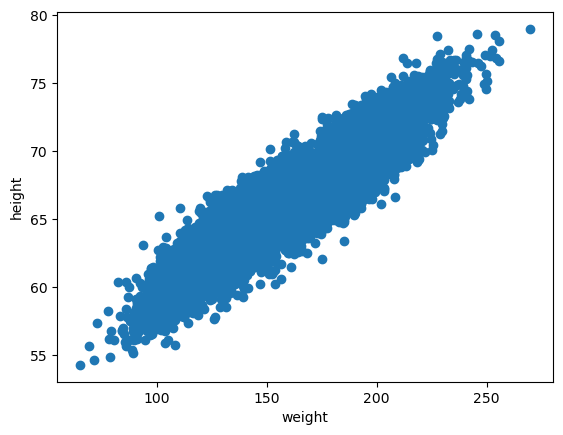

In [87]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('height')

In [88]:
#divide the dataset into dependent features and independent 

In [89]:
x=df[['Weight']]
y=df['Height']

In [90]:
y

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [91]:
x.shape

(10000, 1)

In [92]:
y.shape

(10000,)

In [93]:
#divide the dataset into train and test


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [96]:
from sklearn.preprocessing import StandardScaler


In [97]:
scaler=StandardScaler()

In [98]:
X_train=scaler.fit_transform(X_train)

In [99]:
X_train

array([[-1.26850469],
       [ 1.49950187],
       [ 1.23435095],
       ...,
       [-0.14126217],
       [ 0.56364485],
       [-0.34162408]])

In [100]:
X_test=scaler.transform(X_test)

In [101]:
X_test

array([[ 0.36793009],
       [ 1.05598138],
       [ 0.27747375],
       ...,
       [-1.1281409 ],
       [ 0.81914676],
       [-1.83691726]])

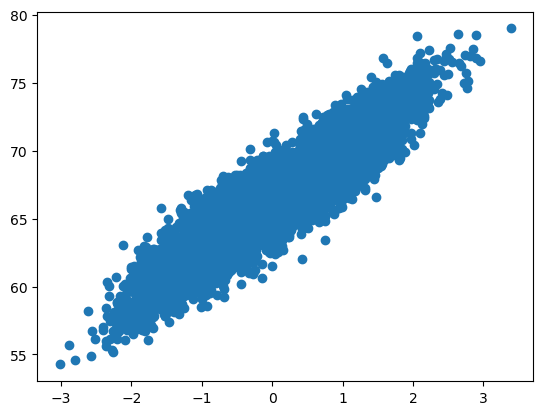

In [102]:
plt.scatter(X_train,y_train) 

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
regressor=LinearRegression()

In [105]:
#training the data set

In [106]:
regressor.fit(X_train,y_train)

LinearRegression()

In [107]:
regressor.intercept_

66.3596814074891

In [108]:
regressor.coef_

array([3.55479288])

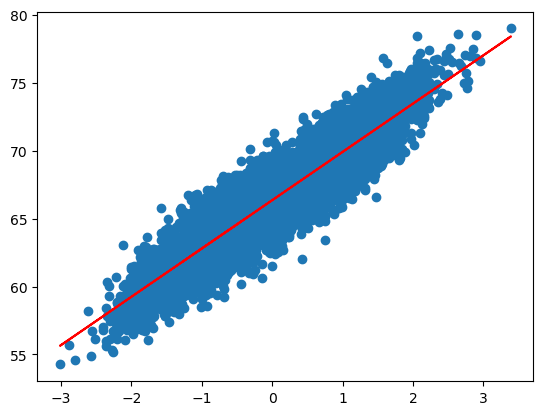

In [109]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [110]:
#prediction for test data set 

In [111]:
y_predict_test=regressor.predict(X_test)

In [112]:
y_predict_test

array([67.66759668, 70.11347651, 67.34604311, ..., 62.34937415,
       69.27157847, 59.829821  ])

In [113]:
y_test

6252    68.687232
4684    68.829334
1731    66.398128
4742    71.929340
4521    67.042903
          ...    
6412    65.748601
8285    60.731857
7853    62.188933
1095    67.068304
6929    58.632720
Name: Height, Length: 2000, dtype: float64

In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [115]:
mse=mean_squared_error(y_test,y_predict_test)

In [116]:
mae=mean_absolute_error(y_test,y_predict_test)

In [117]:
print(mse)
print(mae)

2.112361948474147
1.1588656330992093


# multiple linear regression 

In [118]:
from sklearn.datasets import fetch_california_housing

In [119]:
california=fetch_california_housing()

In [120]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [121]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [122]:
california.target_names

['MedHouseVal']

In [123]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [124]:
# creating the dataframe using the dataset 

In [125]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)

In [126]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [127]:
dataset['Price']=california.target

In [128]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [129]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [131]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [132]:
import seaborn as sns 

<Axes: >

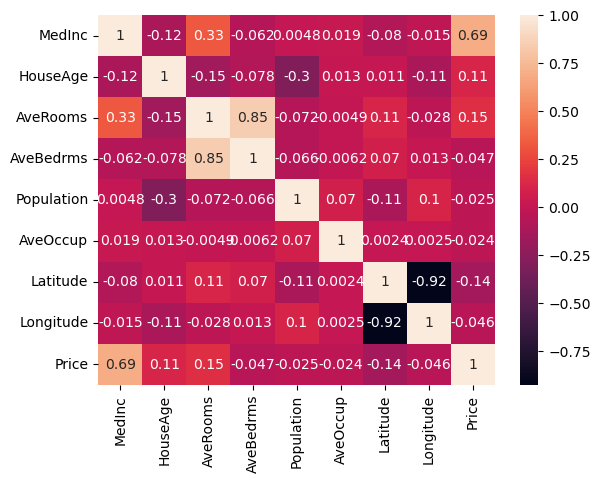

In [133]:
sns.heatmap(dataset.corr(),annot=True)

In [134]:
#divide the independent and dependent 

In [135]:
x=dataset.iloc[:,:-1]

In [136]:
y=dataset.iloc[:,-1]

In [137]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [138]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

In [141]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16750,2.4830,44.0,3.714286,1.040816,339.0,3.459184,37.71,-122.46
11962,2.7083,25.0,5.613293,1.105740,1311.0,3.960725,34.01,-117.40
758,3.8750,21.0,4.828215,1.120921,2461.0,2.361804,37.66,-122.07
17451,4.9292,17.0,6.802885,1.033654,1035.0,2.487981,34.71,-120.46
17018,6.8787,38.0,6.125203,0.980488,1455.0,2.365854,37.52,-122.29
...,...,...,...,...,...,...,...,...
9372,4.1250,37.0,5.109792,1.044510,648.0,1.922849,37.93,-122.53
7291,1.2059,18.0,2.537037,1.089744,1913.0,2.725071,33.98,-118.22
17728,5.5336,6.0,4.905336,0.965577,2160.0,3.717728,37.32,-121.79
7293,2.2059,35.0,2.748491,0.997988,2160.0,4.346076,33.98,-118.23


In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
scaler=StandardScaler()

In [144]:
X_train_scaled=scaler.fit_transform(X_train)

In [145]:
X_test_scaled=scaler.transform(X_test)

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
reg=LinearRegression()

In [148]:
reg


LinearRegression()

In [149]:
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [150]:
reg.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [151]:
reg.intercept_

2.0634768086491184

In [152]:
y_pred=reg.predict(X_test_scaled)

In [153]:
y_pred

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [154]:
y_test

20303    1.674
16966    3.541
10623    1.602
6146     1.408
2208     1.078
         ...  
13490    1.123
9340     3.020
17439    1.724
2602     0.838
7180     1.417
Name: Price, Length: 6812, dtype: float64

In [155]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [156]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.537105694300796
0.5522332399363619


In [157]:
#Accuracy

In [158]:
from sklearn.metrics import r2_score

In [159]:
score=r2_score(y_test,y_pred)

In [160]:
score

0.593595852643664

# Adjusted r square

In [161]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5931179409607519

In [162]:
df= pd.read_csv('Algerian_forest_fires_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Algerian_forest_fires_dataset.csv'

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
#adding new colums

In [ ]:
df.loc[:122,"Region"]=0
df.loc[122:, "Region"]=1

In [ ]:
df

In [ ]:
df[['Region']]=df[['Region']].astype(int)  #convert the float to int

In [ ]:
df

In [169]:
# remove the null  values 

In [170]:
df=df.dropna().reset_index(drop=True)

In [171]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [172]:
df=df.drop(122).reset_index(drop=True)

In [173]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9994,Female,66.172652,136.777454
9995,Female,67.067155,170.867906
9996,Female,63.867992,128.475319
9997,Female,69.034243,163.852461


In [174]:
df.shape

(9999, 3)

In [175]:
# remove the extra space

In [176]:
df.colums=df.columns.str.strip()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14748\3071193702.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums=df.columns.str.strip()


In [177]:
df.colums

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  9999 non-null   object 
 1   Height  9999 non-null   float64
 2   Weight  9999 non-null   float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [179]:
df[['month','day','year','Temperature']]=df[['month','day','year','Temperature']].astype(int)

KeyError: "None of [Index(['month', 'day', 'year', 'Temperature'], dtype='object')] are in the [columns]"

In [ ]:
df.info()

In [180]:
df[['FFMC','DMC','DC','ISI','BUI','FWI']]=df[['FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

KeyError: "None of [Index(['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], dtype='object')] are in the [columns]"

In [ ]:
df.info()

In [181]:
df.copy=df.drop(['day','month','year'],axis=1)

KeyError: "['day', 'month', 'year'] not found in axis"

In [ ]:
df.copy

In [ ]:
#convert the categorical into int 

In [182]:
df.copy['Classes']=np.where(df.copy['Classes'].str.contains('not fire'),0,1)  #not fire to 0 other wise 1

TypeError: 'method' object is not subscriptable

In [183]:
df.copy.to_csv('alegrian_foresr.csv',index=False)

AttributeError: 'function' object has no attribute 'to_csv'

In [184]:
plt.style.use('seaborn')
df.copy.hist(bins=50,figsize=(20,15))
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14748\1049797873.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


AttributeError: 'function' object has no attribute 'hist'

In [185]:
df=pd.read_csv('cleaned_algerian_forest_fires.csv')

In [186]:
df.loc[:122,"Region"]=0
df.loc[122:, "Region"]=1

In [187]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [188]:
df[['Region']]=df[['Region']].astype(int)

In [189]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [190]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [191]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.228279,4.774180,16.664754,7.006557,0.565574,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.672572,4.175318,14.204824,7.438889,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,10.475000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(1), int64(7)
memory usage: 27.8 KB


In [193]:
# independent and dependent features

In [194]:
X=df.drop('FWI',axis=1)

In [195]:
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [196]:
y=df['FWI']

In [197]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [198]:
#train and test split

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train,X_test,y_tarin,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [205]:
X_train.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
58,29,7,2012,32,73,15,0.0,86.6,26.7,127.0,5.6,35.0,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
68,8,8,2012,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
184,2,8,2012,40,34,14,0.0,93.3,10.8,21.4,13.8,10.6,1,1


In [207]:
y_train.head()

16750    2.143
11962    0.878
758      1.793
17451    2.072
17018    3.868
Name: Price, dtype: float64

In [208]:
X_test.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
162,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0,1
60,31,7,2012,35,64,17,0.0,87.2,31.9,145.7,6.8,41.2,1,0
61,1,8,2012,36,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0,0
63,3,8,2012,35,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0,0
69,9,8,2012,35,59,17,0.0,87.4,14.8,57.0,6.9,17.9,1,0


In [209]:
y_test.head()

162     0.8
60     15.7
61      0.9
63      0.8
69      9.9
Name: FWI, dtype: float64

In [210]:
X_train.shape

(183, 14)

In [211]:
X_test.shape

(61, 14)

In [212]:
y_tarin.shape

(183,)

In [213]:
y_test.shape

(61,)

In [214]:
X_train.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
day,1.000000,0.072755,NaN,0.128081,-0.128703,0.008807,-0.230040,0.287309,0.508445,0.543485,0.200518,0.532016,0.205940,0.052383
month,0.072755,1.000000,NaN,0.027700,-0.116593,-0.115608,-0.025454,0.155819,0.153032,0.200202,0.162354,0.168453,0.154849,0.022166
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.128081,0.027700,NaN,1.000000,-0.620160,-0.292643,-0.391780,0.667805,0.459940,0.366012,0.600496,0.437836,0.520961,0.257925
RH,-0.128703,-0.116593,NaN,-0.620160,1.000000,0.263391,0.241248,-0.633029,-0.386025,-0.214661,-0.680848,-0.333190,-0.428274,-0.407969
Ws,0.008807,-0.115608,NaN,-0.292643,0.263391,1.000000,0.110214,-0.164087,-0.004448,0.065566,0.003653,0.024460,-0.066316,-0.217869
Rain,-0.230040,-0.025454,NaN,-0.391780,0.241248,0.110214,1.000000,-0.606500,-0.319853,-0.309199,-0.364722,-0.326064,-0.393743,-0.040920
FFMC,0.287309,0.155819,NaN,0.667805,-0.633029,-0.164087,-0.606500,1.000000,0.598285,0.507218,0.734376,0.586956,0.757892,0.225303
DMC,0.508445,0.153032,NaN,0.459940,-0.386025,-0.004448,-0.319853,0.598285,1.000000,0.888428,0.674481,0.983556,0.590496,0.178564
DC,0.543485,0.200202,NaN,0.366012,-0.214661,0.065566,-0.309199,0.507218,0.888428,1.000000,0.507468,0.946317,0.500250,-0.092346


In [218]:
def correaltion(dataset,threshold):
    col_corr=set()
    corr_mat=dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                colname=corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [219]:
corr_feature=correaltion(X_train,0.85)

In [223]:
corr_feature

{'BUI', 'DC'}

In [225]:
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)

In [226]:
X_train.shape

(183, 12)

In [227]:
X_test.shape

(61, 12)

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
scaler=StandardScaler()

In [230]:
scaler

StandardScaler()

In [231]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [234]:
X_train_scaled

array([[ 1.59683086, -0.44085878,  0.        , ...,  0.23313171,
         0.95197164, -1.01653005],
       [-1.56040855, -1.33727163,  0.        , ..., -0.86385137,
        -1.05045146, -1.01653005],
       [-1.44347376, -1.33727163,  0.        , ..., -1.03078358,
        -1.05045146, -1.01653005],
       ...,
       [-0.04025624,  1.35196693,  0.        , ...,  0.54314867,
         0.95197164,  0.98373875],
       [-1.32653897, -1.33727163,  0.        , ..., -0.57768187,
        -1.05045146,  0.98373875],
       [-0.62493021, -1.33727163,  0.        , ..., -0.792309  ,
        -1.05045146, -1.01653005]])

In [235]:
X_test_scaled

array([[-5.07995413e-01, -4.40858780e-01,  0.00000000e+00,
         5.53431823e-01, -4.05626369e-01, -1.37528414e-01,
         1.21063854e+00, -1.74710012e-01, -5.93001848e-01,
        -7.20766621e-01, -1.05045146e+00,  9.83738754e-01],
       [ 1.83070045e+00, -4.40858780e-01,  0.00000000e+00,
         8.29393740e-01,  1.26485642e-01,  5.42679688e-01,
        -4.09754584e-01,  6.80265101e-01,  1.31841831e+00,
         5.19301209e-01,  9.51971638e-01, -1.01653005e+00],
       [-1.67734335e+00,  4.55554073e-01,  0.00000000e+00,
         1.10535566e+00, -1.13728038e+00, -4.77632465e-01,
        -4.09754584e-01,  1.01088411e-01, -7.70270654e-01,
        -6.25376788e-01, -1.05045146e+00, -1.01653005e+00],
       [-1.44347376e+00,  4.55554073e-01,  0.00000000e+00,
         8.29393740e-01,  5.99716406e-02, -4.77632465e-01,
        -2.42127709e-01, -5.06007217e-02, -7.00904600e-01,
        -6.96919163e-01, -1.05045146e+00, -1.01653005e+00],
       [-7.41865000e-01,  4.55554073e-01,  0.0000000

# Linear

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
Lin=LinearRegression()

In [238]:
Lin

LinearRegression()

In [241]:
Lin.fit(X_train_scaled,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [183, 13828]

In [242]:
y_pred=Lin.predict(X_test_scaled)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [243]:
from sklearn.metrics import mean_absolute_error

In [244]:
mae=mean_absolute_error(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [61, 6812]

In [245]:
from sklearn.metrics import r2_score

In [246]:
score=r2_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [61, 6812]

# Lasso 

In [248]:
from sklearn.linear_model import Lasso

In [249]:
lasso=Lasso()

In [250]:
lasso.fit(X_train_scaled,y_tarin)

Lasso()

In [252]:
y_pred=lasso.predict(X_test_scaled)

In [253]:
y_pred

array([ 2.2798974 , 12.92059019,  2.06032061,  2.02146513,  8.78876668,
       17.45761741, 12.05214197,  6.59181411,  4.23878763,  6.69603296,
       12.13973576,  0.5621624 ,  9.82865762,  0.82059467,  4.25050708,
        6.99085597,  3.90510914, -0.22052865, 18.46479085, 15.46603357,
        5.69932273, 14.51803777, 12.46662428,  9.29514414, 18.3136703 ,
        1.956706  ,  4.45836442,  2.45382875,  0.11314984, 10.25548751,
        0.2247868 , -0.55420713,  7.14504551,  2.84980162,  7.59715093,
        1.59156626,  0.75830028,  3.87241551, -0.46724146, 12.17982361,
       13.17962671, 13.33690911, 15.28035889,  3.09218921, 12.97423411,
       10.16110374,  1.8049812 ,  9.46351788, 11.25033725,  0.82182704,
        2.95218386,  6.12243163, 20.51129875,  3.26365581,  6.3808639 ,
        1.23075174, 10.07416195, 16.02235784,  5.68453429,  9.88785915,
        4.60639211])

In [254]:
y_test

162     0.8
60     15.7
61      0.9
63      0.8
69      9.9
       ... 
201     7.7
149    18.4
175     2.5
226    10.3
49      4.0
Name: FWI, Length: 61, dtype: float64

In [255]:
from sklearn.metrics import mean_absolute_error

In [256]:
mae=mean_absolute_error(y_test,y_pred)

In [257]:
mae

1.2413565873709245

In [258]:
from sklearn.metrics import r2_score

In [259]:
score=r2_score(y_test,y_pred)

In [260]:
score

0.9389882446596667

# Ridge 

In [261]:
from sklearn.linear_model import Ridge


In [262]:
R=Ridge()

In [265]:
R.fit(X_train_scaled,y_tarin)

Ridge()

In [266]:
y_pred=R.predict(X_test_scaled)

In [267]:
y_pred

array([ 0.6154131 , 14.57953844,  0.93619876,  0.84874134,  9.54177878,
       19.99483978, 13.51422193,  6.69701128,  4.29809818,  6.95409281,
       12.78045268,  0.13484883, 10.21189916, -0.51199967,  3.91754106,
        6.51494122,  2.90763129,  0.10462805, 20.12751845, 16.66597264,
        5.84924264, 15.74985512, 13.97898062,  9.25292566, 19.95512315,
        0.15633374,  4.7599582 ,  1.89557968,  0.35660457, 11.36235325,
        0.57031244, -1.32131894,  7.45582167,  1.25246501,  8.17034974,
       -0.35943872,  0.07658568,  3.08751768, -0.42192857, 13.67735679,
       14.75871137, 14.19742991, 16.4142228 ,  2.06539443, 13.67755776,
       11.16492849,  2.77673458,  9.47632624, 11.61437876, -0.34345849,
        2.71382275,  6.42846539, 22.81281327,  2.95854161,  6.84871598,
        0.33050715, 10.46573821, 17.35361598,  4.75689734, 10.25882708,
        4.83649977])

In [268]:
mae=mean_absolute_error(y_test,y_pred)

In [269]:
mae

0.750634877148862

In [270]:
score=r2_score(y_test,y_pred)

In [271]:
score

0.9764690403333587

# Elastic net reg

In [273]:
from sklearn.linear_model import ElasticNet

In [274]:
El=ElasticNet()

In [275]:
El.fit(X_train_scaled,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [183, 13828]

In [276]:
y_pred=El.predict(X_test_scaled)

NotFittedError: This ElasticNet instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [277]:
mae=mean_absolute_error(y_test,y_pred)

In [278]:
mae

0.750634877148862

In [279]:
score=r2_score(y_test,y_pred)

In [280]:
score

0.9764690403333587

In [281]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(R,open('ridge.pkl','wb'))